In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\Alaric\AppData\Local\Temp\ipykernel_17564\2481376646.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

C:\Users\Alaric\AppData\Local\Temp\ipykernel_17564\2943515322.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


predicted=343.272180, expected=342.300000
predicted=343.272180, expected=339.700000
predicted=343.272180, expected=440.400000
predicted=343.272180, expected=315.900000
predicted=343.272180, expected=439.300000
predicted=343.272180, expected=401.300000
predicted=343.272180, expected=437.400000
predicted=343.272180, expected=575.500000
predicted=343.272180, expected=407.600000
predicted=343.272180, expected=682.000000
predicted=343.272180, expected=475.300000
predicted=343.272180, expected=581.300000
predicted=343.272180, expected=646.900000
Test RMSE: 168.871


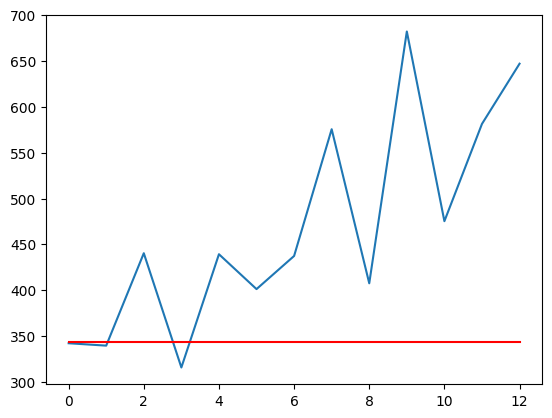

In [4]:

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

model = ARIMA(history, order=(5,1,0))
model_fit = model.fit()

# walk-forward validation
for t in range(len(test)):
	
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [5]:
output

array([343.27218041])